# **Logistic Regression Model, KFold**
---
##Author: Emmanuel Paalam
##Dataset has 13119 rows and 212 columns. No preprocessing
## V3: Joaquin's bootstrapping function used
##Target variable: F3EVERDO

##Import dataset

In [1]:
import pandas as pd

In [2]:
from google.colab import drive

drive.mount("/content/drive")
## Insert pathway to dataset below
df = pd.read_csv("/content/drive/My Drive/research/SURP 2024/colab/data/cleaned/epaalam-cleaned_els_02_12_byf3pststu_v1_0.csv")

df.dropna(inplace=True)

Mounted at /content/drive


##Split data into training and testing subsets

###"F3EVERDO" as target variable

In [3]:
y = df['F3EVERDO']
y.shape

(2484,)

###All over columns saved in another variable

In [4]:
X = df.drop(columns='F3EVERDO', axis=1)
X.shape

(2484, 211)

###Split the data!

In [5]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=58, stratify=y)

In [6]:
print(f"{X_train.shape}, {X_test.shape}, {y_train.shape}, {y_test.shape}")

(1987, 211), (497, 211), (1987,), (497,)


### Perform bootstrapping

In [7]:
import numpy as np
from sklearn.utils import resample

def bootstrap_resample(X, y):
    # Separate minority and majority classes
    X_minority = X[y == 1]
    X_majority = X[y == 0]

    # Upsample minority class
    X_minority_upsampled = resample(X_minority,
                                    replace=True,
                                    n_samples=int(len(X_majority) / 7),
                                    random_state=42)

    # Combine majority class with upsampled minority class
    X_resampled = np.vstack((X_majority, X_minority_upsampled))
    y_resampled = np.hstack((np.zeros(len(X_majority)), np.ones(len(X_minority_upsampled))))

    return X_resampled, y_resampled

##Make logistic regression model

In [8]:
from sklearn.linear_model import LogisticRegression

# Define the logistic regression model
model = LogisticRegression(max_iter=1000, penalty='none')

###Perform cross validation

In [9]:
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, roc_auc_score, roc_curve, confusion_matrix
from sklearn.model_selection import KFold

# Initialize lists to store metrics
acc_scores = []
ppv_scores = []
npv_scores = []
spec_scores = []
sens_scores = []
f1_scores = []
roc_auc_scores = []

kf = KFold(n_splits=10, shuffle=True, random_state=36)

# Perform k-fold cross-validation
for train_index, val_index in kf.split(X_train):
    X_train_fold, X_val_fold = X_train.iloc[train_index], X_train.iloc[val_index]
    y_train_fold, y_val_fold = y_train.iloc[train_index], y_train.iloc[val_index]

    # Train the model
    model.fit(X_train_fold, y_train_fold)

    # Predict on the validation fold
    y_val_pred = model.predict(X_val_fold)

    # Calculate evaluation metrics
    acc_scores.append(accuracy_score(y_val_fold, y_val_pred))
    ppv_scores.append(precision_score(y_val_fold, y_val_pred))
    npv_scores.append(confusion_matrix(y_val_fold, y_val_pred)[0, 0] / (confusion_matrix(y_val_fold, y_val_pred)[0, 0] + confusion_matrix(y_val_fold, y_val_pred)[1, 0]))
    spec_scores.append(confusion_matrix(y_val_fold, y_val_pred)[0, 0] / (confusion_matrix(y_val_fold, y_val_pred)[0, 0] + confusion_matrix(y_val_fold, y_val_pred)[0, 1]))
    sens_scores.append(recall_score(y_val_fold, y_val_pred))
    f1_scores.append(f1_score(y_val_fold, y_val_pred))
    roc_auc_scores.append(roc_auc_score(y_val_fold, y_val_pred))

# Print average evaluation metrics over all folds
print(f'Average Accuracy: {sum(acc_scores)/len(acc_scores)}')
print(f'Average Precision (PPV): {sum(ppv_scores)/len(ppv_scores)}')
print(f'Average NPV: {sum(npv_scores)/len(npv_scores)}')
print(f'Average Specificity: {sum(spec_scores)/len(spec_scores)}')
print(f'Average Sensitivity: {sum(sens_scores)/len(sens_scores)}')
print(f'Average F1-Score: {sum(f1_scores)/len(f1_scores)}')
print(f'Average ROC-AUC: {sum(roc_auc_scores)/len(roc_auc_scores)}')

/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_logistic.py:1173: FutureWarning: `penalty='none'`has been deprecated in 1.2 and will be removed in 1.4. To keep the past behaviour, set `penalty=None`.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_logistic.py:1173: FutureWarning: `penalty='none'`has been deprecated in 1.2 and will be removed in 1.4. To keep the past behaviour, set `penalty=None`.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_logistic.py:1173: FutureWarning: `penalty='none'`has been deprecated in 1.2 and will be removed in 1.4. To keep the past behaviour, set `penalty=None`.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_logistic.py:1173: FutureWarning: `penalty='none'`has been deprecated in 1.2 and will be removed in 1.4. To keep the past behaviour, set `penalty=None`.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_logistic.py:11

Average Accuracy: 0.9466626059590884
Average Precision (PPV): 0.7160101010101011
Average NPV: 0.960172707356544
Average Specificity: 0.9833180643314459
Average Sensitivity: 0.4919001782531195
Average F1-Score: 0.5634882351163142
Average ROC-AUC: 0.7376091212922827


/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_logistic.py:458: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


In [10]:
X_train_resampled, y_train_resampled = bootstrap_resample(X_train, y_train)
model.fit(X_train_resampled, y_train_resampled)

/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_logistic.py:1173: FutureWarning: `penalty='none'`has been deprecated in 1.2 and will be removed in 1.4. To keep the past behaviour, set `penalty=None`.
  warnings.warn(


LogisticRegression(max_iter=1000, penalty='none')

##Metrics

In [11]:
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, roc_auc_score, roc_curve, confusion_matrix

y_test_pred = model.predict(X_test)

# Calculate evaluation metrics
test_accuracy = accuracy_score(y_test, y_test_pred)
test_precision = precision_score(y_test, y_test_pred)
test_recall = recall_score(y_test, y_test_pred)
test_f1 = f1_score(y_test, y_test_pred)
test_roc_auc = roc_auc_score(y_test, y_test_pred)

# Confusion matrix for testing data
tn_test, fp_test, fn_test, tp_test = confusion_matrix(y_test, y_test_pred).ravel()

# Calculate specificity and negative predictive value for testing data
test_specificity = tn_test / (tn_test + fp_test)
test_npv = tn_test / (tn_test + fn_test)

# Print the evaluation metrics for testing data
print('Evaluation metrics for testing data:')
print(f'Test Accuracy: {test_accuracy}')
print(f'Test Precision (PPV): {test_precision}')
print(f'Test Recall (Sensitivity): {test_recall}')
print(f'Test F1-Score: {test_f1}')
print(f'Test ROC-AUC: {test_roc_auc}')
print(f'Test Specificity: {test_specificity}')
print(f'Test Negative Predictive Value (NPV): {test_npv}')


Evaluation metrics for testing data:
Test Accuracy: 0.9517102615694165
Test Precision (PPV): 0.6666666666666666
Test Recall (Sensitivity): 0.6666666666666666
Test F1-Score: 0.6666666666666666
Test ROC-AUC: 0.8203181489515545
Test Specificity: 0.9739696312364425
Test Negative Predictive Value (NPV): 0.9739696312364425


/usr/local/lib/python3.10/dist-packages/sklearn/base.py:432: UserWarning: X has feature names, but LogisticRegression was fitted without feature names
  warnings.warn(


In [12]:
# Predicting a single data point using iloc to avoid KeyError
index = 1
single_test_case = X_test.iloc[index].values.reshape(1, -1)
single_prediction = model.predict(single_test_case)

print("\nSingle Test Case Prediction:")
print(single_prediction)
print("Real value: ")
print(y_test.iloc[index])


Single Test Case Prediction:
[0.]
Real value: 
0


In [13]:
# Calculate the percentage of target values
minority_class = X_train[y_train == 1]
majority_class = X_train[y_train == 0]
print(len(minority_class))
print(len(majority_class))

146
1841


Confusion Matrix:
[[449  12]
 [ 12  24]]


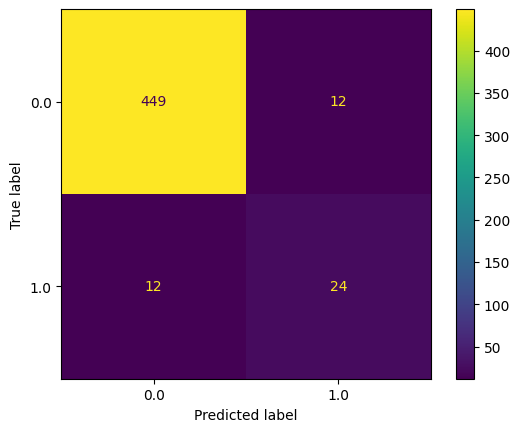

In [14]:
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay

cm = confusion_matrix(y_test, y_test_pred)

disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=model.classes_)
disp.plot()

print("Confusion Matrix:")
print(cm)